<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Computer_vision_exercises_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - OpenCV - Third Task
@author Tomasz Skrzypczyk

Here are some OpenCv exercises, you are asked to use the internet ( [official documentation](https://docs.opencv.org/4.x/)) to find the methods you need.

In this assignment we will be dealing with green screen problem. In short, you will have to extract the non green part of an image and apply backgroud from another image.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread("/content/green_screen.jpg")
background = cv2.imread("/content/hawaii_background.jpg")

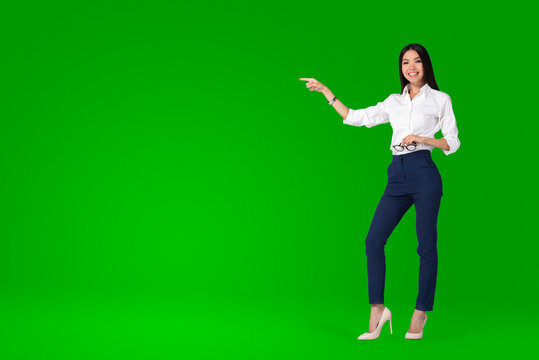

In [ ]:
cv2_imshow(image)

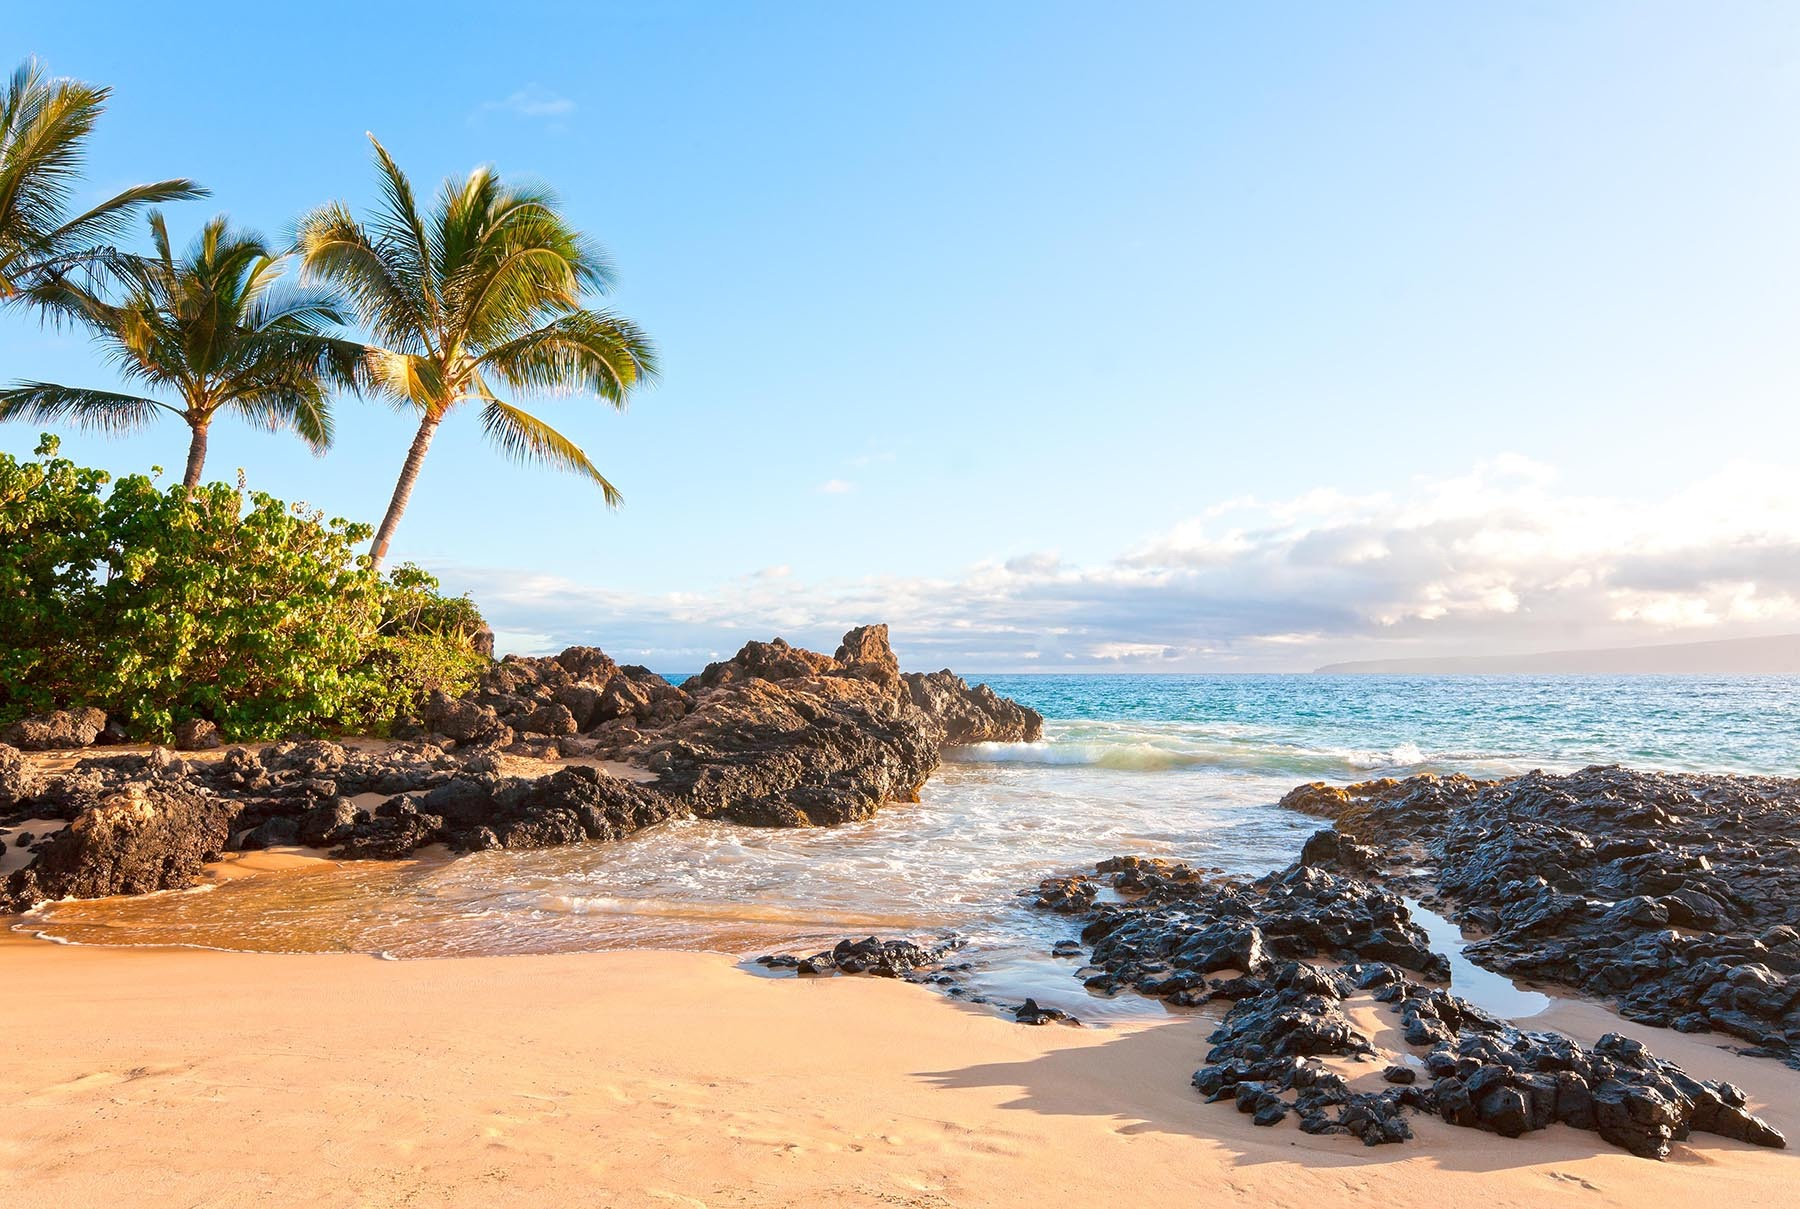

In [ ]:
cv2_imshow(background)

Oh, wow, that's a huge image!

In [ ]:
# find out the girl's image shape
image.shape

(360, 539, 3)

In [ ]:
# now reshape the background image(, notice the order of width and height!)
background_reshaped = cv2.resize(background, (539, 360))

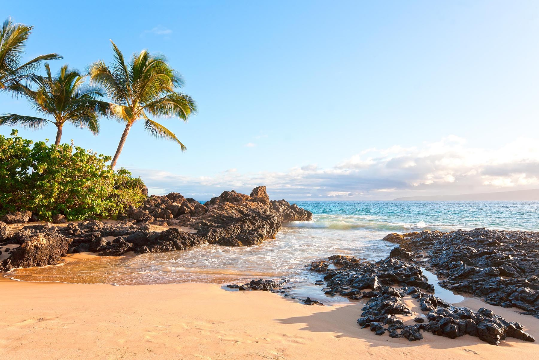

In [ ]:
cv2_imshow(background_reshaped)

In [ ]:
# https://stackoverflow.com/questions/47483951/how-to-define-a-threshold-value-to-detect-only-green-colour-objects-in-an-image
# convert the image to HSV
img_hsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

The X axis corresponds the Hue value. Pich the right range for the green color.
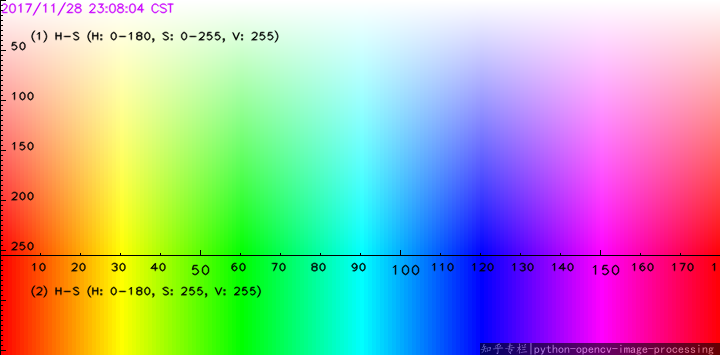

In [ ]:
# create a mask using the inRange function, try to play with different thresholds for green color.
mask = cv2.inRange(img_hsv,(36,0,0), (70,255,255))


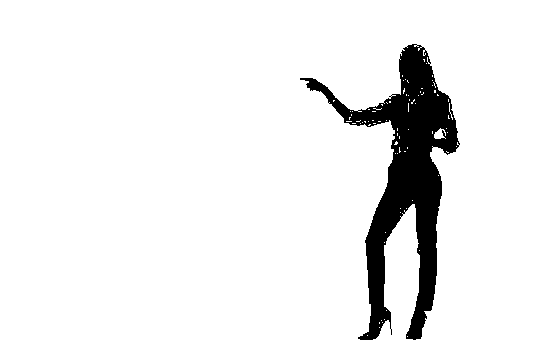

In [ ]:
cv2_imshow(mask)

In [ ]:
# use erosion with (3,) filter kernel
import numpy as np
# apply erosion with kernel (3,3)
kernel = np.ones((3,3),np.uint8)

eroded_mask = cv2.erode(mask,kernel)

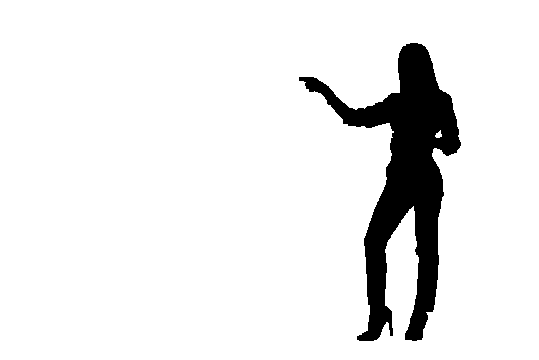

In [ ]:
cv2_imshow(eroded_mask)

Here comes the most difficult part. Create an image that combines the two images according to the mask. Use numpy to solve this issue (*np.where* can be useful). It may take a few minutes. 

In [ ]:
import numpy as np
output_img = background_reshaped.copy()

output_img[eroded_mask==0]=image[eroded_mask==0]

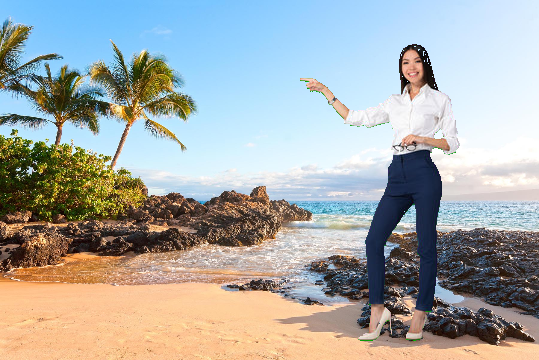

In [ ]:
cv2_imshow(output_img)